In [1]:
import os, sys
import pandas as pd
import sys

path='../../'
if not path in sys.path:
    sys.path.append(path)
    
import numpy as np
from pprint import pprint
from llm_model import *



/opt/miniconda/envs/autog/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


config.py:get_openapi_token:35: get_auth(ssmkey=OPENAI_API_KEY, envvar=openai_apikey, fconfig=.env/openai_apikey.json)
Getting tenx/env/vars from existing file /tmp/tenx_env_vars.json..
using STRAPI_STAGE=unknown


In [2]:
df2 = pd.read_csv('/home/tigisty/jobEngine/api.job-engine/api/output/extracted_skills/job_skill/job_desc.csv')
df2.head()

,title,post_link,description,manual_cluster
0,Java Software Engineer,https://www.linkedin.com/jobs/view/3372342081/...,About the job\nAbout us\n\nIGT Solutions is a ...,1
1,Data Engineer,NaN,"Hands-on experience in Airflow, REST API and P...",0
2,Software Engineer (Junior or Senior),https://www.linkedin.com/jobs/view/3331733065/...,About the job\nJob Description\n\nAbout Samoti...,1
3,Software Engineer,https://www.linkedin.com/jobs/view/3373533103/...,"About the job\nHi Connections,\n\nHope all you...",1
4,Data Engineer,https://www.linkedin.com/jobs/view/3241808693/...,About the job\nWe are looking for a talented D...,0


In [3]:
jobs_df = pd.read_csv('/home/tigisty/jobEngine/api.job-engine/api/output/extracted_skills/job_skill/dat.csv')
jobs_df.head()

,user_id,code_content
0,619,# Week_1_User_Analytics_in_the_Telecommunicati...
1,766,from sqlalchemy import create_engine\n\n\nprin...
2,665,%reload_ext autoreload\n\n%autoreload 2\nimpor...
3,606,import seaborn as sns\nimport matplotlib.pyplo...
4,699,# Telecom_Data_Analysis\n\n## Overview\n\nThis...


In [3]:
jobs_df.shape

(201, 2)

In [30]:
df = jobs_df.sample(n=2, random_state=42)


In [29]:
def job_clustering_using_text_embedding2(jobs_df):
    client = OpenAI(api_key=openai_api_key)
    job_embeddings = []

    for description in jobs_df['code_content']:
        response = client.embeddings.create(
            input=description,
            model="text-embedding-3-small"
        )
        embedding = response.data[0].embedding
        job_embeddings.append(embedding)

    job_embeddings = np.array(job_embeddings)
    
    # optimal_k = silhouette_to_find_optimal_k(job_embeddings)
    optimal_k = 2
    
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(job_embeddings)
    # centroids = kmeans.cluster_centers_
    return cluster_labels, job_embeddings

In [9]:
cluster_labels, job_embeddings = job_clustering_using_text_embedding2(df2)

In [31]:
cluster_labels, job_embeddings = job_clustering_using_text_embedding2(df)

In [33]:
df['text_embedding_cluster'] = cluster_labels


In [34]:
df.head()

,user_id,code_content,text_embedding_cluster
95,670,import os\nfrom dotenv import load_dotenv\nimp...,0
15,603,#importing libraries\nimport streamlit as st\n...,1


### Job Clustering

In [3]:
cluster_labels, job_embeddings = job_clustering_using_text_embedding(jobs_df)

In [4]:
print(job_embeddings)

[[-0.03907134 -0.00100394  0.05695781 ...  0.00215536 -0.00116567
  -0.00165674]
 [ 0.023536    0.00811217  0.06555287 ... -0.03065857  0.01251808
  -0.00487865]
 [ 0.00611849  0.01965468  0.02553095 ...  0.00178993  0.01589235
  -0.01605593]
 ...
 [-0.03207499  0.02174763  0.06351143 ...  0.00148126  0.02691745
  -0.04288127]
 [-0.04714392  0.00977416  0.02165703 ... -0.00809859  0.01875043
   0.01469258]
 [ 0.00530479 -0.00354056  0.06771766 ... -0.00831366  0.01684483
   0.00904473]]


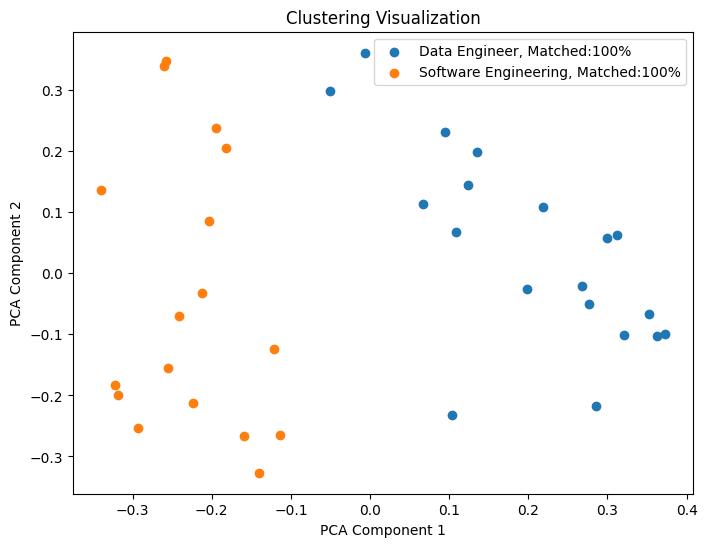

In [5]:
visualize_clusters(job_embeddings, cluster_labels,jobs_df)

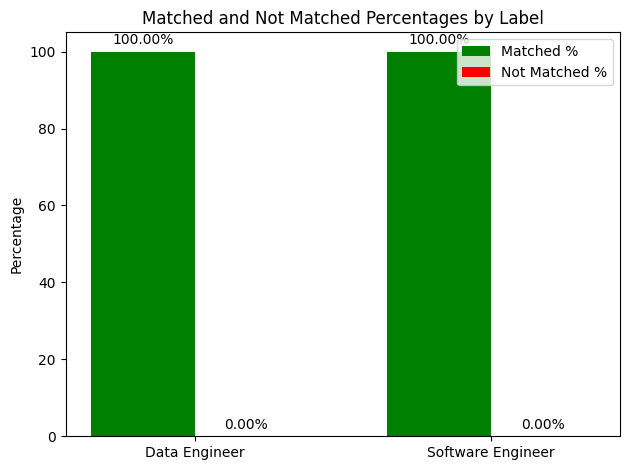

In [6]:
percentages = calculate_matched_percentages(jobs_df, cluster_labels)
bar_plot(percentages)

#### Clustering using BERT 

In [7]:
cluster_labels2, job_embeddings2 = job_clustering_using_bert(jobs_df)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


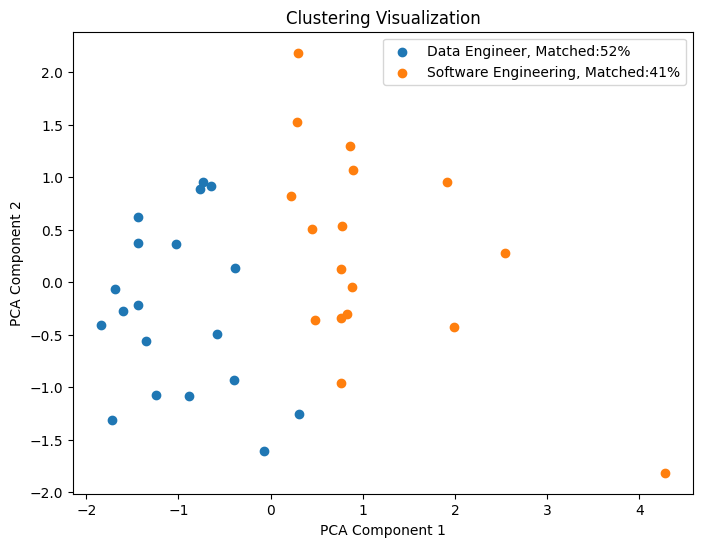

In [8]:
visualize_clusters(job_embeddings2, cluster_labels2, jobs_df)

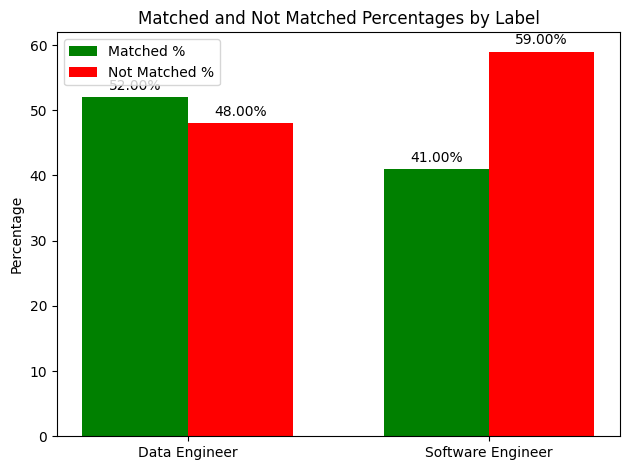

In [9]:
percentages = calculate_matched_percentages(jobs_df, cluster_labels2)
bar_plot(percentages)

#### Job Clustering Using Paragraph embeddings

In [10]:
cluster_labels3, job_embeddings3 = job_clustering_using_paragraph_embedding(jobs_df)


/home/tigisty/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


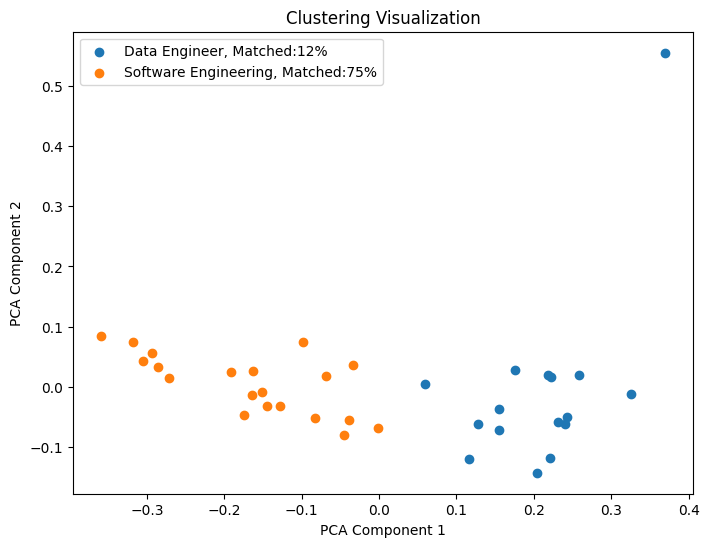

In [11]:
visualize_clusters(job_embeddings3, cluster_labels3, jobs_df)

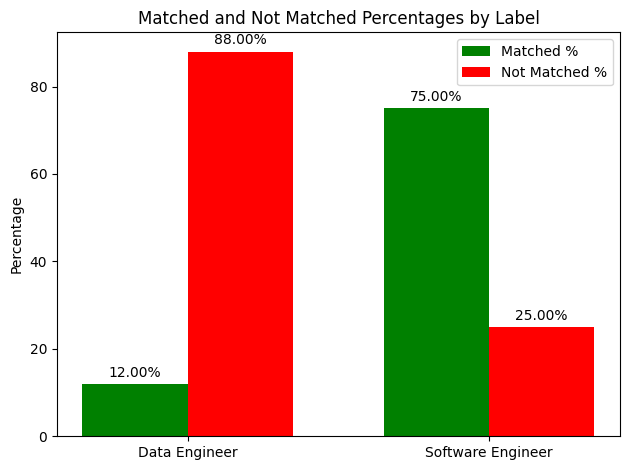

In [12]:
percentages = calculate_matched_percentages(jobs_df, cluster_labels3)
bar_plot(percentages)

In [37]:
# elbow_optimal = elbow_to_find_optimal_k(job_embeddings)
# print(elbow_optimal)

In [17]:
# silhouette_optimal = silhouette_to_find_optimal_k(job_embeddings)
# print(silhouette_optimal)

In [16]:
#count size of each cluster
cluster_sizes = Counter(cluster_labels)
for label, size in cluster_sizes.items():
    print(f"Cluster {label + 1} Size: {size}")


Cluster 2 Size: 17
Cluster 1 Size: 19


In [15]:
#count size of each cluster
cluster_sizes = Counter(cluster_labels3)
for label, size in cluster_sizes.items():
    print(f"Cluster {label + 1} Size: {size}")


Cluster 2 Size: 20
Cluster 1 Size: 16


In [17]:
#adding labels to data frame
jobs_df['text_embedding_cluster'] = cluster_labels
jobs_df['bert_cluster'] = cluster_labels2
jobs_df['paragraph_cluster'] = cluster_labels3
jobs_df.to_csv('/home/tigisty/jobEngine/api.job-engine/api/output/extracted_skills/job_skill/clustered_job_desc.csv', index=False)


In [18]:
jobs_df.head()

,title,post_link,description,manual_cluster,text_embedding_cluster,bert_cluster,paragraph_cluster
0,Java Software Engineer,https://www.linkedin.com/jobs/view/3372342081/...,About the job\nAbout us\n\nIGT Solutions is a ...,1,1,1,1
1,Data Engineer,NaN,"Hands-on experience in Airflow, REST API and P...",0,0,1,0
2,Software Engineer (Junior or Senior),https://www.linkedin.com/jobs/view/3331733065/...,About the job\nJob Description\n\nAbout Samoti...,1,1,0,1
3,Software Engineer,https://www.linkedin.com/jobs/view/3373533103/...,"About the job\nHi Connections,\n\nHope all you...",1,1,1,1
4,Data Engineer,https://www.linkedin.com/jobs/view/3241808693/...,About the job\nWe are looking for a talented D...,0,0,0,1


In [19]:
# Cluster 2 or software Engineering of text embedding
cluster_2_jobs = jobs_df[jobs_df['text_embedding_cluster'] == 1]
for title in cluster_2_jobs['title']:
    print(title)

Java Software Engineer
Software Engineer (Junior or Senior)
Software Engineer
Software Engineer
Sr. Software Engineer- Java or C++ (Part-Time)
SENIOR BACK END ENGINEER
software engineer(web3)
Backend Engineer (Java)
Software Engineer
Software Engineer
Software Engineer, Back End
Software Engineer
Software Engineer
Full-Stack Software Engineer
Full Stack Software Engineer
Java Software Engineer
C# Software Engineer - AWS


In [20]:
# Cluster 1 or Data Engineering of text embedding
cluster_1_jobs = jobs_df[jobs_df['text_embedding_cluster'] == 0]
for title in cluster_1_jobs['title']:
    print(title)

Data Engineer
Data Engineer
Data Engineer - DocPlanner
Data Engineer
Data Engineer - Stefanini LATAM
Junior Data Engineer
Data Engineer - Fulltime
Azure Data Engineer
Data Scientist
Data Engineer
Data Engineer
Data Engineer
Data Engineer
Machine Learning Engineer
Data Engineer
Data Engineer
Data Engineer
Cognos Data Engineer
Data Engineer - Verisk


In [21]:
# Cluster 2 or software Engineering using bert embedding
cluster_2_jobs = jobs_df[jobs_df['bert_cluster'] == 1]
for title in cluster_2_jobs['title']:
    print(title)

Java Software Engineer
Data Engineer
Software Engineer
Software Engineer
Data Engineer - DocPlanner
SENIOR BACK END ENGINEER
software engineer(web3)
Data Engineer - Stefanini LATAM
Backend Engineer (Java)
Data Engineer - Fulltime
Software Engineer
Azure Data Engineer
Data Engineer
Data Engineer
Data Engineer
Cognos Data Engineer
Data Engineer - Verisk


In [22]:
# Cluster 1 or Data Engineering using bert embedding
cluster_1_jobs = jobs_df[jobs_df['bert_cluster'] == 0]
for title in cluster_1_jobs['title']:
    print(title)

Software Engineer (Junior or Senior)
Data Engineer
Data Engineer
Sr. Software Engineer- Java or C++ (Part-Time)
Software Engineer
Software Engineer
Junior Data Engineer
Software Engineer, Back End
Data Scientist
Data Engineer
Software Engineer
Data Engineer
Machine Learning Engineer
Full-Stack Software Engineer
Full Stack Software Engineer
Data Engineer
Data Engineer
Java Software Engineer
C# Software Engineer - AWS


In [24]:
# Cluster 2 or software Engineering of text embedding
cluster_2_jobs = jobs_df[jobs_df['paragraph_cluster'] == 0]
for title in cluster_2_jobs['title']:
    print(title)

Data Engineer
Data Engineer - DocPlanner
software engineer(web3)
Data Engineer - Stefanini LATAM
Junior Data Engineer
Data Engineer - Fulltime
Data Scientist
Data Engineer
Data Engineer
Software Engineer
Data Engineer
Data Engineer
Machine Learning Engineer
Data Engineer
Cognos Data Engineer
Data Engineer - Verisk


In [25]:
# Cluster 2 or software Engineering of text embedding
cluster_2_jobs = jobs_df[jobs_df['paragraph_cluster'] == 1]
for title in cluster_2_jobs['title']:
    print(title)

Java Software Engineer
Software Engineer (Junior or Senior)
Software Engineer
Data Engineer
Software Engineer
Data Engineer
Sr. Software Engineer- Java or C++ (Part-Time)
SENIOR BACK END ENGINEER
Backend Engineer (Java)
Software Engineer
Software Engineer
Software Engineer, Back End
Software Engineer
Azure Data Engineer
Full-Stack Software Engineer
Full Stack Software Engineer
Data Engineer
Data Engineer
Java Software Engineer
C# Software Engineer - AWS


In [ ]:
keys = [About us, About Samotics, What We Are Looking For, Culture and tech stack, What We Offer, RequirementsRoles & Responsibilities,#ExperienceNeeded,\
    What You Will Do, What You Will Need, Nice to have, Qualifications,Responsibilities, Qualifications, Company Overview,]

## CV Generation

In [2]:

df = pd.read_csv('/home/tigisty/jobEngine/api.job-engine/api/output/extracted_skills/job_skill/clustered_job_desc.csv')
df.head()

,title,post_link,description,manual_cluster,text_embedding_cluster,bert_cluster
0,Java Software Engineer,https://www.linkedin.com/jobs/view/3372342081/...,About the job\nAbout us\n\nIGT Solutions is a ...,1,1,1
1,Data Engineer,NaN,"Hands-on experience in Airflow, REST API and P...",0,0,1
2,Software Engineer (Junior or Senior),https://www.linkedin.com/jobs/view/3331733065/...,About the job\nJob Description\n\nAbout Samoti...,1,1,0
3,Software Engineer,https://www.linkedin.com/jobs/view/3373533103/...,"About the job\nHi Connections,\n\nHope all you...",1,1,1
4,Data Engineer,https://www.linkedin.com/jobs/view/3241808693/...,About the job\nWe are looking for a talented D...,0,0,0


In [3]:
# Cluster 2 or software Engineering of text embedding
cluster_2_jobs = df[df['text_embedding_cluster'] == 1]
 
for title in cluster_2_jobs['title']:
    print(title)

Java Software Engineer
Software Engineer (Junior or Senior)
Software Engineer
Software Engineer
Sr. Software Engineer- Java or C++ (Part-Time)
SENIOR BACK END ENGINEER
software engineer(web3)
Backend Engineer (Java)
Software Engineer
Software Engineer
Software Engineer, Back End
Software Engineer
Software Engineer
Full-Stack Software Engineer
Full Stack Software Engineer
Java Software Engineer
C# Software Engineer - AWS


In [4]:
# Cluster 2 or software Engineering of text embedding
cluster_1_jobs = df[df['text_embedding_cluster'] == 0]
 
for title in cluster_1_jobs['title']:
    print(title)

Data Engineer
Data Engineer
Data Engineer - DocPlanner
Data Engineer
Data Engineer - Stefanini LATAM
Junior Data Engineer
Data Engineer - Fulltime
Azure Data Engineer
Data Scientist
Data Engineer
Data Engineer
Data Engineer
Data Engineer
Machine Learning Engineer
Data Engineer
Data Engineer
Data Engineer
Cognos Data Engineer
Data Engineer - Verisk


In [12]:
template  = "You are a helpful AI assistant capable of generate a comprehensive CV (curriculum vitae)\
        based on the following {job_descriptions}. The CV should highlight qualifications, relevant experience, and skills aligning with each positions requirements.\
            the generated cv must have the following key points:\
            ### Roles : the roles should be a unique role that can represent all the positions of job descriptions.\
            ### Educational Background: this is the educational degree required by the jobs.\
            ### Experiences: the experience should be the required experiences in a particular specialization. don't include experiences in a specific tool or technique. \
            ### Skills: put all the skills required by the role in this category.\
            ### Domain Knowledge and Attitudes:  Add domain knowledge and attitude needed for the roles."            


In [13]:
result = generating_ideal_cv(template,cluster_1_jobs)

In [15]:
pprint(result)

('**[Your Name]**\n'
 '\n'
 '[Your Address] | [City, State, Zip] | [Your Email] | [Your Phone Number]\n'
 '\n'
 '---\n'
 '\n'
 '### **Objective**\n'
 '\n'
 'A dedicated and results-driven professional aiming to leverage a '
 'comprehensive background in data engineering and machine learning to '
 'contribute effectively to an innovative organization. Possessing a robust '
 'blend of technical expertise, analytical acumen, and a proactive attitude, I '
 'am keen on applying my skills to solve complex problems, drive business '
 'value, and facilitate data-driven decision-making.\n'
 '\n'
 '---\n'
 '\n'
 '### **Role:** Data & Machine Learning Engineer\n'
 '\n'
 '---\n'
 '\n'
 '### **Educational Background**\n'
 '\n'
 '- Bachelor’s/Master’s Degree in Computer Science, Engineering, Data Science, '
 'Mathematics, or a related technical field.\n'
 '\n'
 '---\n'
 '\n'
 '### **Experiences**\n'
 '\n'
 '- Extensive experience in the design, construction, and optimization of data '
 'infrastructu

In [10]:
pprint(result)

('Based on the provided job descriptions and requirements for roles related to '
 'Data Engineering, including specializations such as Azure Data Engineer, '
 'Junior Data Engineer, and Machine Learning Engineer, as well as a Data '
 'Scientist role, here is a representative CV tailored to these positions.\n'
 '\n'
 '---\n'
 '\n'
 '## [Your Name]\n'
 '\n'
 '[Your Contact Information: Phone | Email | LinkedIn]\n'
 '\n'
 '---\n'
 '\n'
 '### Objective\n'
 '\n'
 'Dynamic and results-oriented Data Engineer and Scientist with extensive '
 'experience in designing, implementing, and optimizing data solutions and '
 'pipelines to enhance business operations. Proven track record in leveraging '
 'data-driven insights to drive business strategies and decisions. Seeking to '
 'apply expertise in a challenging environment that values innovation and a '
 'data-centric approach to problem solving.\n'
 '\n'
 '---\n'
 '\n'
 '### Role\n'
 '\n'
 'Data Engineer and Scientist\n'
 '\n'
 '---\n'
 '\n'
 '###

In [5]:
job_embeddings = job_clustering_using_text_embedding(jobs_df)


In [3]:
def generate_paragraph_ids(description):
    description_id = jobs_df[jobs_df['description'] == description].index[0] + 1
    paragraphs = description.split('\n')
    paragraph_ids = [f"j{description_id}p{i+1}" for i in range(len(paragraphs))]
    return paragraph_ids
# jobs_df['paragraph_ids'] = jobs_df['description'].apply(generate_paragraph_ids)
